In [1]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models,layers,utils
import pandas as pd


In [2]:
# BRACOL images have three colour channels, with all the images of 256 x 256 resolution, choosing a seed value for reproducibility
# batchsize is selected be 32
IMAGE_L=256
IMAGE_W=256
IMAGE_SIZE=(IMAGE_L,IMAGE_W)
BATCH_SIZE=32
SEED_VALUE=1728
n_channel=3

In [3]:
training_ds=tf.keras.preprocessing.image_dataset_from_directory('/Users/leulnigussieketsela/Downloads/ethiopian cofee leaf dataset/train aug',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED_VALUE
)

Found 10800 files belonging to 4 classes.


In [4]:
validation_ds=tf.keras.preprocessing.image_dataset_from_directory('/Users/leulnigussieketsela/Downloads/ethiopian cofee leaf dataset/test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED_VALUE
)

Found 1200 files belonging to 4 classes.


In [5]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory('/Users/leulnigussieketsela/Downloads/ethiopian cofee leaf dataset/test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED_VALUE
)

Found 1200 files belonging to 4 classes.


In [6]:
import tensorflow as tf

def load_and_preprocess_image(filename):
    try:
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, [IMAGE_L, IMAGE_W])
        image = image / 255.0  # Normalize to [0, 1]
        return image
    except tf.errors.InvalidArgumentError:
        return None

def preprocess_dataset(file_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y))
    dataset = dataset.filter(lambda img, label: img is not None)
    return dataset

# Example usage: assuming file_paths and labels are lists or arrays of file paths and labels
# dataset = preprocess_dataset(file_paths, labels)



In [7]:
def class_label_distribution(dataset):
  class_names_raw=dataset.class_names
  class_names=[cls.split('_')[1] if '_' in cls else cls for cls in class_names_raw] # Handle cases without '_'
  n_classes=len(class_names)
  print(f"Number of classes in the dataset are {n_classes}")
  dataset_total_labels=[]
  for ib,lb in dataset:
    dataset_total_labels+=[class_names[lb] for lb in lb.numpy()]

  label_value_counts=pd.Series(dataset_total_labels).value_counts()
  print(f"Number of labels for each class are following:\n{label_value_counts}")
  print(label_value_counts.plot.pie())

Number of classes in the dataset are 4


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

Number of labels for each class are following:
Phoma          2700
Cerscospora    2700
Leaf rust      2700
Healthy        2700
Name: count, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


2024-08-02 22:23:29.690448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


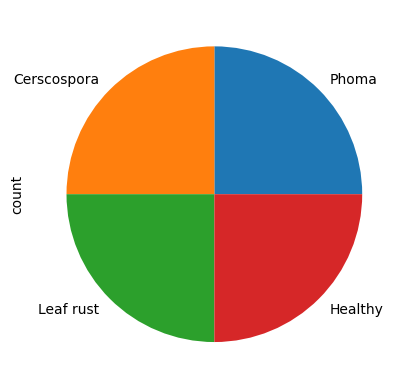

In [8]:
class_label_distribution(training_ds)

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Number of classes in the dataset are 4


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

Number of labels for each class are following:
Healthy        300
Leaf rust      300
Phoma          300
Cerscospora    300
Name: count, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
2024-08-02 22:23:32.281230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


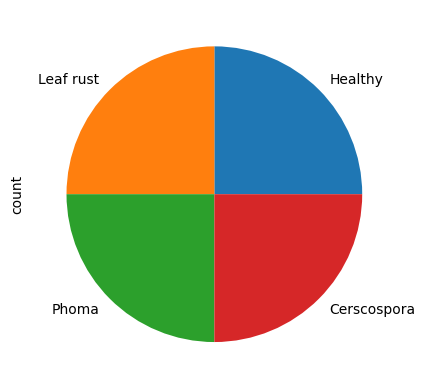

In [9]:
class_label_distribution(validation_ds)

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Number of classes in the dataset are 4


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

Number of labels for each class are following:
Healthy        300
Leaf rust      300
Phoma          300
Cerscospora    300
Name: count, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


Invalid SOS parameters for sequential JPEG
2024-08-02 22:23:34.730241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


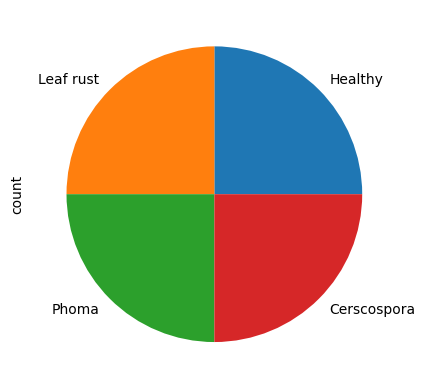

In [10]:
class_label_distribution(test_ds)

In [11]:
"Plotting training images"
#plt.figure(figsize=(12,12))
#for ib,lb in training_ds.take(1):
#    for i in range(1):
#        ax=plt.subplot(3,5,i+1)
#        plt.imshow(ib[i].numpy().astype('uint8'))
#        plt.title(training_ds.class_names[lb[i].numpy()],fontsize=8)
#        plt.axis('off')

'Plotting training images'

In [12]:
#Optimizing the dataset with caching and prefetching
#Look at the following link for more information,https://www.tensorflow.org/guide/data_performance
def optimized_dataset(ds):
  return ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [13]:
train=optimized_dataset(training_ds)
valid=optimized_dataset(validation_ds)
test=optimized_dataset(test_ds)

In [14]:
input_shape=(BATCH_SIZE,IMAGE_L,IMAGE_W,n_channel)
n_classes=4
def bulid_CNN(n_convo_layers=4,n_filters=4,n_dense_layers=3,n_nodes=64,drop_out=True):

  "Part:1 NN Skeleton followed by rescaling layer"

  #setting up sequential model
  model= tf.keras.Sequential()

  #rescaling the image
  model.add(layers.Rescaling(1.0/255)) # Removed 'experimental'

  "Part:2 Convolution and Pooling"

  #first convolution layer
  model.add(layers.Conv2D(filters=n_filters,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='same'))

  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  #adding subsequent convolution layers
  for i in range(n_convo_layers-1):

    model.add(layers.Conv2D(filters=2*(i+1)*n_filters,kernel_size=(3,3),activation='relu',padding='same'))

    model.add(layers.MaxPooling2D(pool_size=(2,2)))


  "Part:3 ANN"

  #flattening prior to dense layers
  model.add(layers.Flatten())

  #adding dense layer followed by batch normalization and drop out (if True)
  for i in range(n_dense_layers-1):
    model.add(layers.Dense(n_nodes,activation='relu'))
    model.add(layers.BatchNormalization())
    if drop_out==True:
      model.add(layers.Dropout(0.5))

  #final dense layer
  model.add(layers.Dense(n_classes,activation='softmax'))

  model.build(input_shape=input_shape)

  print(model.summary())

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy']) # Changed 'accuracy' to ['accuracy']

  return model

#Building  CNN

In [15]:
from types import new_class

model1=bulid_CNN(n_convo_layers=8,n_filters=32,n_dense_layers=2,n_nodes=64,drop_out=True)
#callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0000001,verbose=1)
history1=model1.fit(
    train,
    epochs=5,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 256, 256, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 128, 128, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 128, 128, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 64, 64, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 64, 64, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 32, 32, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 32, 32, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 16, 16, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 16, 16, 256)      │       442,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 8, 8, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 8, 8, 320)        │       737,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 4, 4, 320)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 4, 4, 384)        │     1,106,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 2, 2, 384)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 2, 2, 448)        │     1,548,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 1, 1, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 448)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,179,140 (15.94 MB)

 Trainable params: 4,179,012 (15.94 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/5


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
2024-08-02 22:23:45.816863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:25: Filling up shuffle buffer (this may take a while): 154 of 1000
Invalid SOS parameters for sequential JPEG
Invalid SOS p

300/338 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5264 - loss: 1.0840

KeyboardInterrupt: 

In [2]:
def plot_evaluation_curves(history):

  plt.figure(figsize=(12,8))
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['training accuracy','validation accuracy'])

  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['training loss','validation loss'])
plot_evaluation_curves(history1)

NameError: name 'history1' is not defined

In [ ]:
plt.figure(figsize=(12,8))

for image_batch,label_batch in test_ds.take(1):
    batch_prediction=model1.predict(image_batch)
    for i in range(8):
        plt.subplot(4,2,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(f'Original Label: {class_names[label_batch[i].numpy()]} \n Predicted Label:{class_names[np.argmax(batch_prediction[i])]}',fontsize=8)
        plt.axis('off')

In [ ]:
from sklearn.metrics import classification_report
def compute_accuracy(model=model1,ds=test):
  original_labels=[]
  predicted_labels=[]
  for image_batch,label_batch in ds:
      batch_prediction=model1.predict(image_batch)
      #print(image_batch)
      current_batch_original_labels=[class_names[lb] for lb in label_batch.numpy()]
      original_labels=original_labels+current_batch_original_labels

      #np.argmax(batch_prediction[i])

      current_batch_predicted_labels=[class_names[label] for label in [np.argmax(a) for a in batch_prediction]]
      predicted_labels=predicted_labels+current_batch_predicted_labels

  print(classification_report(original_labels,predicted_labels))

compute_accuracy(ds=train)
compute_accuracy(ds=valid)
compute_accuracy(ds=test)


In [ ]:
model1.save('model_CNN1.h5')